**<font size=5>利用手写数字识别初识深度学习的keras库</font>**

In [1]:
from sklearn.datasets import load_digits

**<font size=4>1. 加载数据</font>**

In [2]:
digits = load_digits()

In [3]:
data, label = digits.data, digits.target

原本使用对是keras.datasets包中对mnist，因为网速太慢了，这里换成了sklearn中对load_digits

In [4]:
data.shape

(1797, 64)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_images, test_images, train_labels, test_labels = train_test_split(data, label, stratify=label,random_state=0)

In [7]:
train_images.shape, train_labels.shape

((1347, 64), (1347,))

In [8]:
test_images.shape

(450, 64)

训练集图像有1347个，测试集图像有450个，图像存储为numpy类型

In [9]:
import matplotlib as mpl

In [10]:
import matplotlib.pyplot as plt

In [11]:
some_digit = train_images[3]
some_digit_image = some_digit.reshape(8,8)

<function matplotlib.pyplot.show(*args, **kw)>

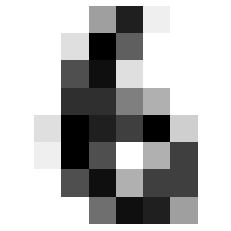

In [12]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show

这个图像看起来很像6，但是究竟是不是呢？

In [13]:
train_labels[3]

6

In [14]:
train_labels[:10]

array([7, 3, 6, 6, 7, 6, 7, 9, 2, 9])

**<font size=4>2. 神经网络的构建</font>**

In [15]:
from keras import models

Using TensorFlow backend.


In [16]:
from keras import layers

In [17]:
network = models.Sequential()
network.add(layers.Dense(512, activation="relu"))
network.add(layers.Dense(10, activation="softmax"))

对于第二层是一个10路softmax层，他将返回一个由10个概率组成的，每个概率值表示当前数字图像属于10个数字类别中某一个的概率

训练网络，我们还需要编译步骤的三个参数：<br>
**损失函数**：网络如何衡量在训练数据集上的性能，网络朝着正确的方向前进<br>
**优化器**：基于训练数据和损失函数来更新网络的机制<br>
**在训练和测试过程中需要监控的指标**：精度accuracy<br>

In [18]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
train_images.dtype

dtype('float64')

In [20]:
train_images[0]

array([ 0.,  0.,  0., 10., 12., 15., 16., 13.,  0.,  0.,  6., 15.,  6.,
        4., 14.,  9.,  0.,  0., 10.,  6.,  0.,  3., 14.,  2.,  0.,  1.,
       14.,  1.,  0., 12.,  6.,  0.,  0.,  0.,  3.,  0.,  5., 13.,  0.,
        0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
       13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.])

In [21]:
train_images = train_images.astype("float32")/255

In [22]:
test_images = test_images.astype("float32")/255

对标签进行分类编码

In [23]:
from keras.utils import to_categorical

将类别向量转换为二进制（只有0和1）的矩阵类型表示。其表现为将原有的类别向量转换为one-hot编码的形式

In [24]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
train_labels[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

**<font size=4>3. 将训练数据送入神经网络</font>**

In [27]:
network.fit(train_images, train_labels, epochs=10, batch_size=50)

Epoch 1/10
1347/1347 [==============================] - 0s 33us/step - loss: 1.3312 - accuracy: 0.8471
Epoch 2/10
1347/1347 [==============================] - 0s 30us/step - loss: 1.1510 - accuracy: 0.8716
Epoch 3/10
1347/1347 [==============================] - 0s 28us/step - loss: 0.9915 - accuracy: 0.8738
Epoch 4/10
1347/1347 [==============================] - 0s 21us/step - loss: 0.8592 - accuracy: 0.8894
Epoch 5/10
1347/1347 [==============================] - 0s 23us/step - loss: 0.7469 - accuracy: 0.8909
Epoch 6/10
1347/1347 [==============================] - 0s 27us/step - loss: 0.6595 - accuracy: 0.8946
Epoch 7/10
1347/1347 [==============================] - 0s 19us/step - loss: 0.5841 - accuracy: 0.9042
Epoch 8/10
1347/1347 [==============================] - 0s 22us/step - loss: 0.5229 - accuracy: 0.9079
Epoch 9/10
1347/1347 [==============================] - 0s 20us/step - loss: 0.4713 - accuracy: 0.9176
Epoch 10/10
1347/1347 [==============================] - 0s 19us/step - l

**<font size=4>4. 网络对test_images生成预测</font>**

In [28]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

450/450 [==============================] - 0s 66us/step


In [29]:
test_loss, test_acc

(0.43223355293273924, 0.9288889169692993)